<a href="https://colab.research.google.com/github/rliu7926/nie-research-project/blob/master/2.1%20Redshifting%20Waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redshifing Waveforms

This notebook corresponds with section 2.1 of the overview: cosmological redshift. We follow tutorial 1.4 of the LIGO GW workshop. 

In [ ]:
## Install the PyCBC package
! pip install -q 'PyCBC==1.15.3' 'lalsuite==6.66'

     |████████████████████████████████| 3.1MB 4.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 28.5MB 132kB/s 
     |████████████████████████████████| 890kB 33.4MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 1.6MB 33.6MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 3.2MB 39.3MB/s 


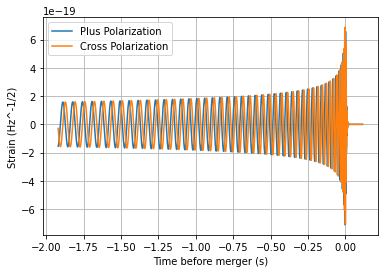

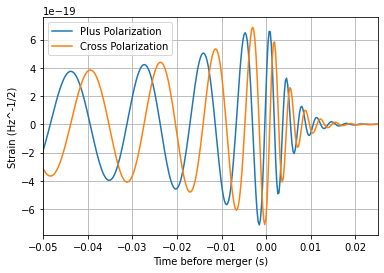

In [ ]:
## Generate waveform

# Initialize the environment

%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

# Calculate waveform (plus and cross polarizations)

waveform, waveform_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/4096,
                         f_lower=15)

# Create a plot of the waveform 
# Default distance is set to 1 Mpc

pylab.plot(waveform.sample_times, waveform, label = 'Plus Polarization')
pylab.plot(waveform_cross.sample_times, waveform_cross, label = 'Cross Polarization')
pylab.xlabel('Time before merger (s)')
pylab.ylabel('Strain (Hz^-1/2)')
pylab.legend()
pylab.grid()
pylab.show()

# Create a zoomed in plot of the waveform 

pylab.plot(waveform.sample_times, waveform, label = 'Plus Polarization')
pylab.plot(waveform_cross.sample_times, waveform_cross, label = 'Cross Polarization')
pylab.xlabel('Time before merger (s)')
pylab.ylabel('Strain (Hz^-1/2)')
pylab.xlim(-0.05, +0.025)
pylab.legend()
pylab.grid()
pylab.show()




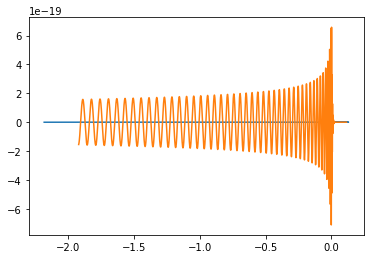

In [ ]:
## Factor in distance effects (amplitude and redshift)

# Separate the amplitude and time into two separate lists 

waveform_amplitude500 = [0.0] * len(waveform)
waveform_time500 = [0.0] * len(waveform)

for i in range(0, len(waveform)-1):
  waveform_amplitude500[i] = waveform[i]
  waveform_time500[i] = waveform.sample_times[i]

# Change the amplitude based on distance 

distance = 500
waveform_amplitude500 = [i/distance for i in waveform_amplitude500]

# Change the time based on redshift

redshift = 0.1365
timestretch = 1 + redshift

waveform_time500 = [i*timestretch for i in waveform_time500]

# Plot the new waveform 

pylab.plot(waveform_time500, waveform_amplitude500)
pylab.plot(waveform.sample_times, waveform)

In [ ]:
## Create a function to generalize to arbitrary distances

def create_waveform(mass1, mass2, resolution, frequencybound, distance):
  waveform, waveform_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                                             mass1=mass1,
                                             mass2=mass1,
                                             delta_t=resolution,
                                             f_lower=frequencybound)
  
  waveform_amplitude = [0.0] * len(waveform)
  waveform_time = [0.0] * len(waveform)

  for i in range(0, len(waveform)-1):
    waveform_amplitude[i] = waveform[i]
    waveform_time[i] = waveform.sample_times[i]

  waveform_amplitude = [i/distance for i in waveform_amplitude]
  
  redshift = 1 + 72*distance/(299792.458-72*distance)
  waveform_time = [i*redshift for i in waveform_time]

  return waveform_amplitude, waveform_time
  

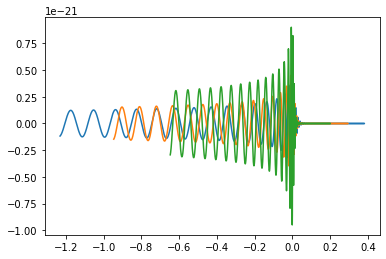

In [ ]:
waveform_amplitude2500, waveform_time2500 = create_waveform(mass1=40, mass2=40,
                                                            resolution=1/8192,
                                                            frequencybound=20,
                                                            distance=2500)

waveform_amplitude2000, waveform_time2000 = create_waveform(mass1=40, mass2=40,
                                                            resolution=1/8192,
                                                            frequencybound=20,
                                                            distance=2000)

waveform_amplitude1000, waveform_time1000 = create_waveform(mass1=40, mass2=40,
                                                            resolution=1/8192,
                                                            frequencybound=20,
                                                            distance=1000)

pylab.plot(waveform_time2500, waveform_amplitude2500)
pylab.plot(waveform_time2000, waveform_amplitude2000)
pylab.plot(waveform_time1000, waveform_amplitude1000)